<a href="https://colab.research.google.com/github/tak-creator/giganci/blob/main/Algorytm_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
print(df.head(10), '\n')
print(df.sample(10), '\n') # 10 randomowo :o
print(df.tail(10), '\n') # 10 ostatnich
print(len(df), '\n')
print(len(df.columns)-1, '\n')

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa 

     sepal_length  sepal_width  petal_length  petal_width     species
136           6.3          3.4           5.6          2.4   virginica
7             5.0          3.4           1.5          0.2      setosa
41            4.5          2.3           1.3          0.3      setosa
50            

In [ ]:
print([col for col in df.columns if col != "species"])# rodzaje kolumn bez "species"

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [ ]:
print(df["species"].unique())
print(df["species"].value_counts())

['setosa' 'versicolor' 'virginica']
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


<Axes: xlabel='species', ylabel='Count'>

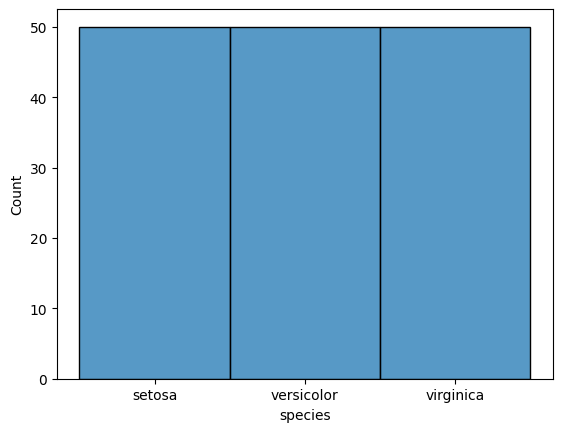

In [ ]:
sns.histplot(df['species'])

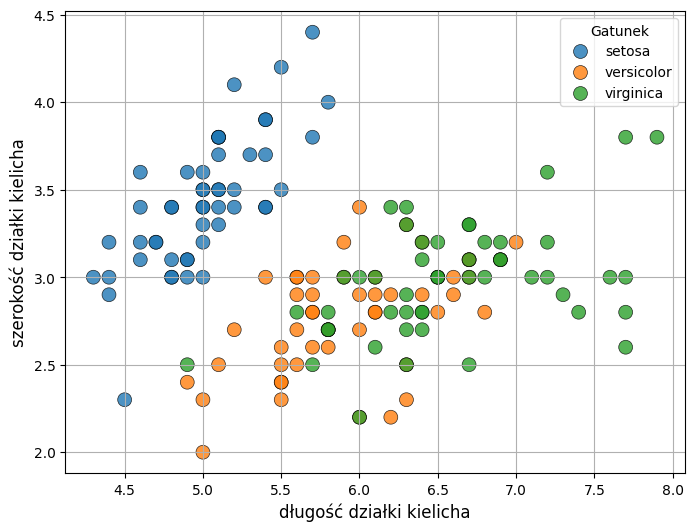

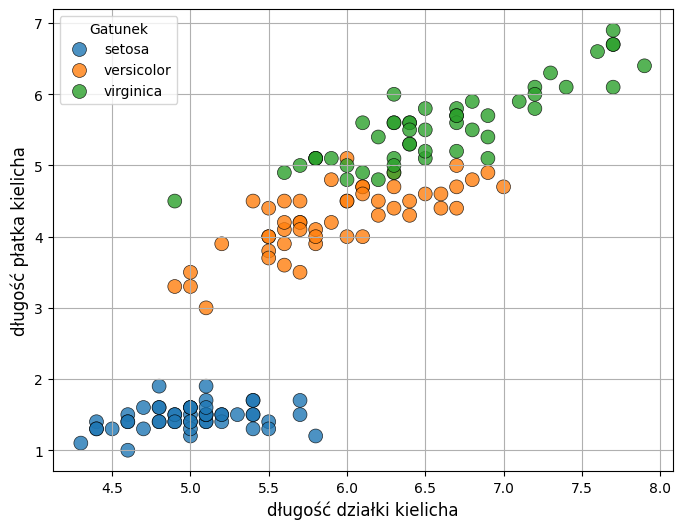

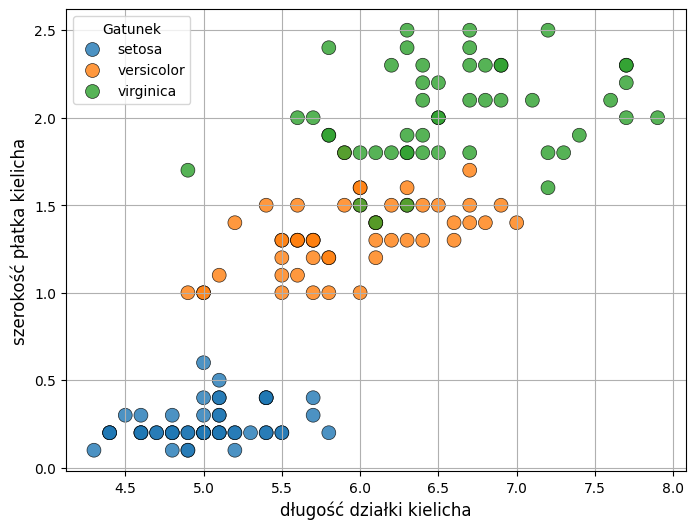

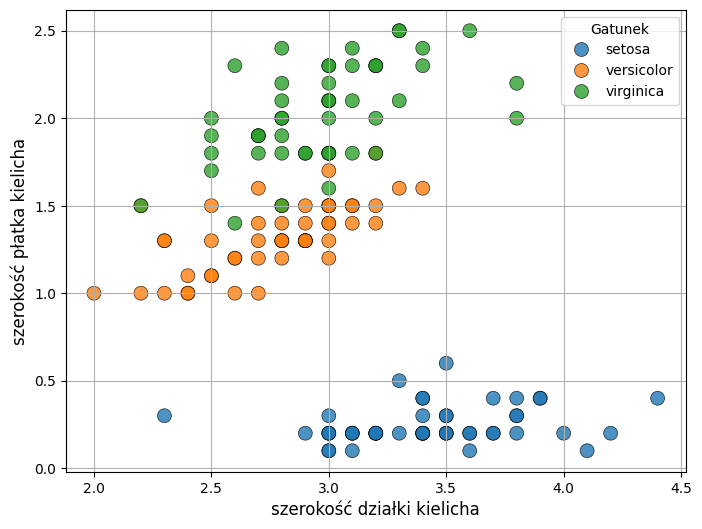

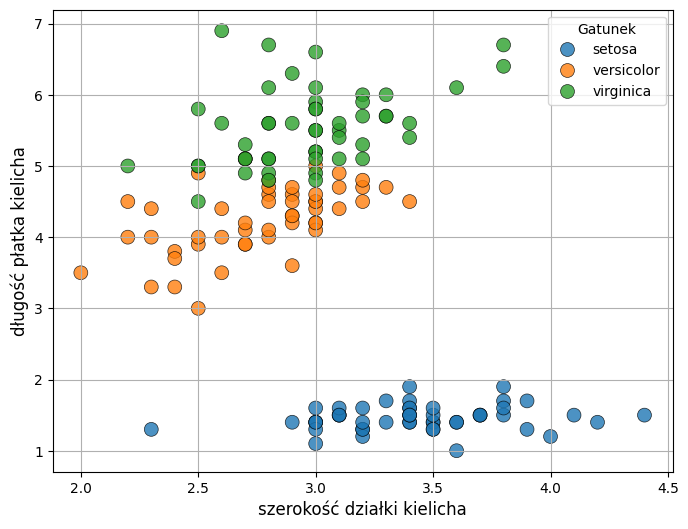

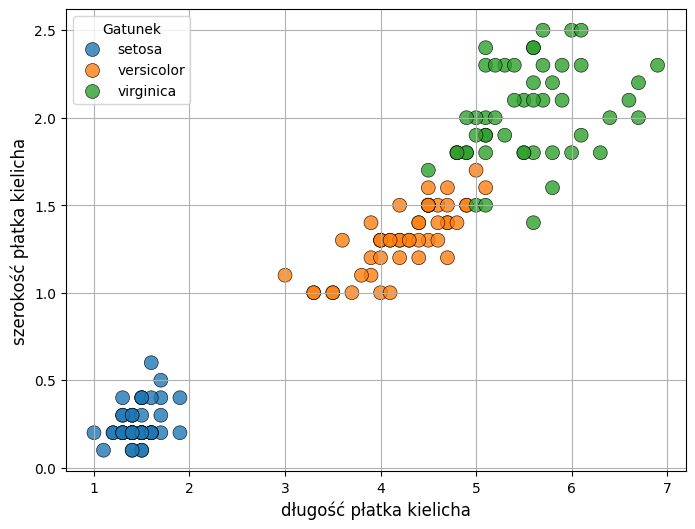

In [ ]:
feature_pairs = [
    ('sepal_length', 'sepal_width'),
    ('sepal_length', 'petal_length'),
    ('sepal_length', 'petal_width'),
    ('sepal_width',  'petal_width'),
    ('sepal_width',  'petal_length'),
    ('petal_length','petal_width')
]

feature_pairs_pl = {
    "sepal_length": "długość działki kielicha",
    "sepal_width": "szerokość działki kielicha",
    "petal_length": "długość płatka kielicha",
    "petal_width": "szerokość płatka kielicha"
}

for x_features, y_features in feature_pairs:
    plt.figure(figsize=(8, 6))
    scatter = sns.scatterplot(
        data=df,
        x=x_features,
        y=y_features,
        hue='species',
        alpha=0.8,
        s=100,
        edgecolor='k',
        linewidth=0.5
    )

    x_nme_pl = feature_pairs_pl[x_features]
    y_nme_pl = feature_pairs_pl[y_features]

    plt.xlabel(x_nme_pl, fontsize=12)
    plt.ylabel(y_nme_pl, fontsize=12)

    plt.legend(title="Gatunek", fontsize=10)
    plt.grid(True)
    plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    x=df['petal_length'],    # Twoja pierwotna seria na osi X
    y=df['petal_width'],     # Twoja pierwotna seria na osi Y
    z=df['sepal_length'],    # Twoja pierwotna seria na osi Z
    color=df['species'],     # kolor wg gatunku
    opacity=0.8              # przezroczystość markerów
)

fig.update_layout(
    legend_title_text='Gatunek',
    scene=dict(
        xaxis_title='długość płatka kielicha',
        yaxis_title='szerokość płatka kielicha',
        zaxis_title='długość działki kielicha'
    )
)

fig.show()

#fig = px.scatter_3d(df, x='petal_length', y='petal_width', z='sepal_length', color='species')
#fig.show()

In [ ]:
x = df.drop(columns='species').values
y = df['species'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

print(f'Liczba próbek w zbiorze uczącym: {x_train.shape[0]}')
print(f'Liczba próbek w zbiorze testowych: {x_test.shape[0]}')

unique_train, countr_train = np.unique(y_train, return_counts=True)
for label, count in zip(unique_train, countr_train):
    print(f'Liczba próbek z etykietą {label}: {count}')

unique_test, countr_test = np.unique(y_test, return_counts=True)
for label, count in zip(unique_test, countr_test):
    print(f'Liczba próbek z etykietą {label}: {count}')

Liczba próbek w zbiorze uczącym: 120
Liczba próbek w zbiorze testowych: 30
Liczba próbek z etykietą setosa: 40
Liczba próbek z etykietą versicolor: 40
Liczba próbek z etykietą virginica: 40
Liczba próbek z etykietą setosa: 10
Liczba próbek z etykietą versicolor: 10
Liczba próbek z etykietą virginica: 10


In [ ]:
def calculate_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)

In [ ]:
for i, train_point in enumerate(x_train):
    for j, test_point in enumerate(x_test):
        distance = calculate_distance(train_point, test_point)

In [ ]:
def knn_classifier(x_train, y_train, x_test, k):
    y_pred = []
    for test_point in x_test:
        distances = []
        for train_point, train_label in zip(x_train, y_train):
            distance = calculate_distance(test_point, train_point)
            distances.append((distance, train_label)) # Store distances with labels

        # Sort distances and get the k nearest neighbors
        distances.sort(key=lambda x: x[0]) # Sort by distance
        k_nearest_labels = [label for dist, label in distances[:k]]

        # Predict the label based on the majority class among k-nearest neighbors
        # (you might need to import collections.Counter for this)
        from collections import Counter
        predicted_label = Counter(k_nearest_labels).most_common(1)[0][0]
        y_pred.append(predicted_label)

    return y_pred # Return the list of predictions

In [ ]:
knn_classifier(x_train, y_train, x_test, 3)

['setosa',
 'virginica',
 'versicolor',
 'versicolor',
 'setosa',
 'versicolor',
 'setosa',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'virginica',
 'virginica',
 'versicolor',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'virginica',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'virginica',
 'versicolor',
 'versicolor',
 'setosa',
 'virginica',
 'setosa']

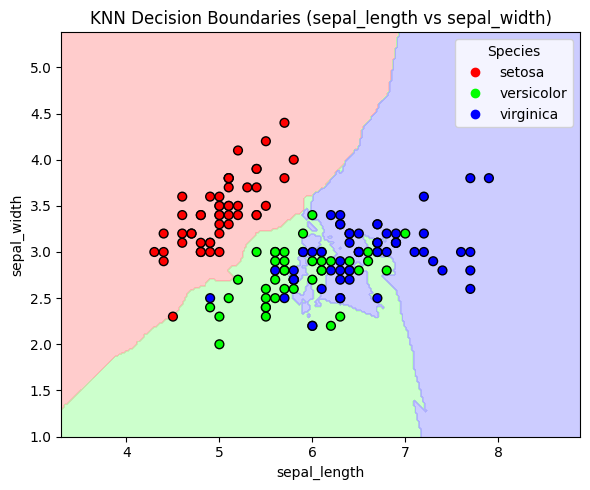

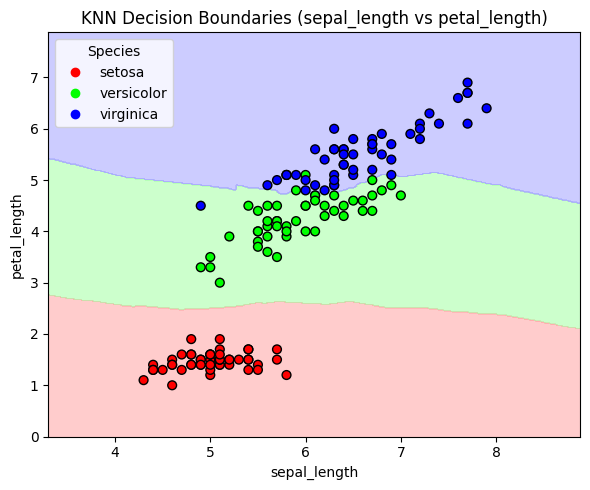

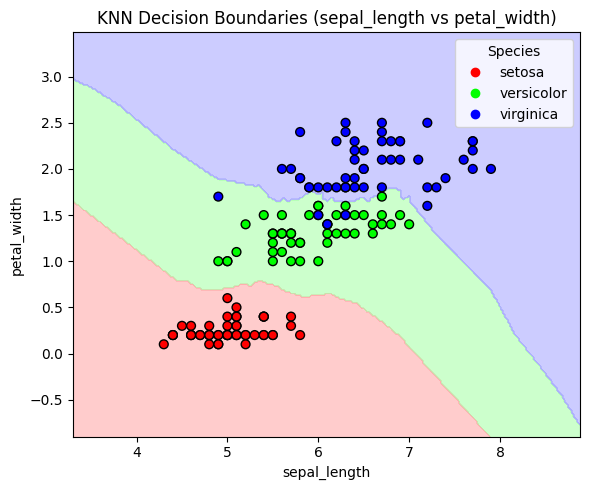

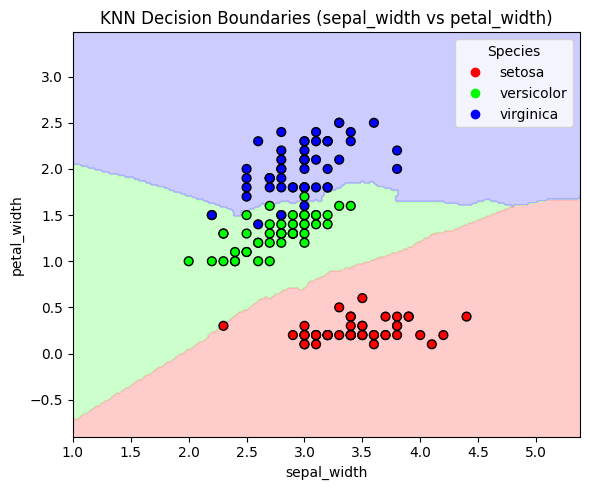

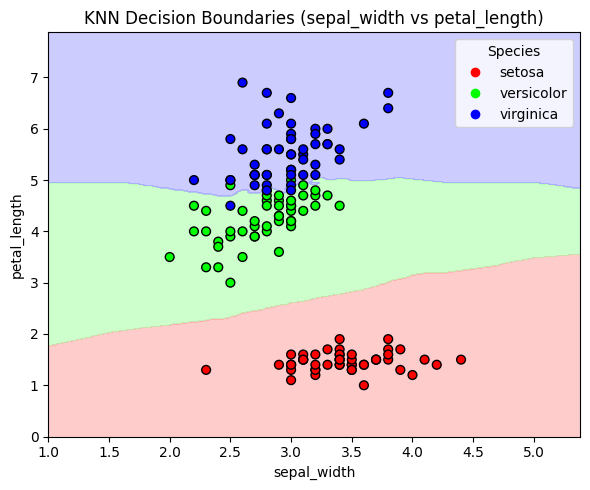

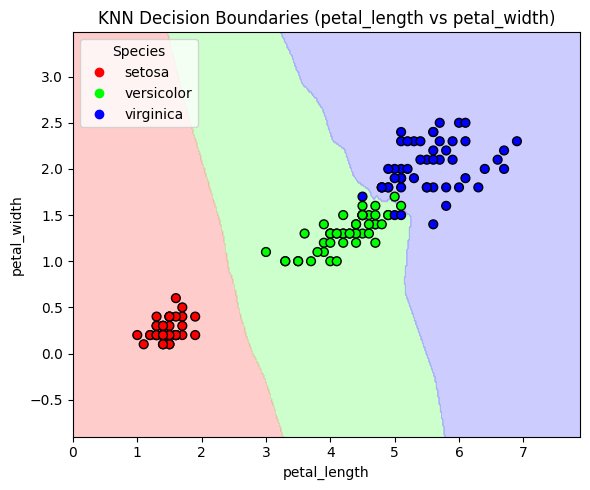

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

# Wczytanie danych iris
iris = sns.load_dataset('iris')

# Zakodowanie etykiet gatunków na wartości numeryczne
le = LabelEncoder()
y = le.fit_transform(iris['species'])

# Lista par cech
feature_pairs = [
    ('sepal_length', 'sepal_width'),
    ('sepal_length', 'petal_length'),
    ('sepal_length', 'petal_width'),
    ('sepal_width',  'petal_width'),
    ('sepal_width',  'petal_length'),
    ('petal_length','petal_width')
]

# Kolory dla klas
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Dla każdej pary cech: trenowanie KNN i rysowanie granic decyzyjnych
for x_feature, y_feature in feature_pairs:
    # Przygotowanie macierzy cech dla danej pary
    X = iris[[x_feature, y_feature]].values

    # Trenowanie modelu KNN (k=5)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X, y)

    # Tworzenie siatki punktów
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predykcja klasyfikacji dla każdego punktu siatki
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Rysowanie wypełnionego obszaru decyzyjnego
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

    # Rysowanie punktów danych
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)

    # Legenda z nazwami gatunków
    handles = scatter.legend_elements()[0]
    labels = le.inverse_transform([0, 1, 2])
    plt.legend(handles, labels, title="Species")

    # Opisy osi i tytuł
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'KNN Decision Boundaries ({x_feature} vs {y_feature})')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.tight_layout()
    plt.show()
